Here goes my second hypothesis:

I simply want to get the top countries in which more people has died from an encounter with a shark or derivative(According to the data in Shark Attack table, of course.)

In [43]:
#Imports:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [44]:
#Uploading tmy "clean" data:
attack4 = pd.read_csv('Input/attack4.csv',encoding = 'latin-1')
display(attack4)

,Country,Area,realDate,realYear,Activity,Injury,Fatal (Y/N),Species,Sex,Type,Unnamed: 10
0,ADMIRALTY ISLANDS,Manus Island,15-Oct-1962,1962,NaN,lacerations,N,NaN,M,Unprovoked,NaN
1,AFRICA,NaN,30-Sep-1846,1846,Jumped into river,FATAL,Y,NaN,M,Unprovoked,NaN
2,AMERICAN SAMOA,Tutuila Island,12-Dec-1958,1958,Cleaning hull of ship,thigh,Y,Tiger shark,M,Unprovoked,NaN
3,AMERICAN SAMOA,Tutuila Island,08-Aug-1955,1955,Swimming,FATAL,Y,Blue shark,M,Unprovoked,NaN
4,AMERICAN SAMOA,Tutuila Island,29-Dec-1954,1954,Dived overboard & was swimming near stern of t...,FATAL,Y,NaN,M,Unprovoked,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5315,YEMEN,Aden,29-Jun-1901,1901,Diving around anchored liner,NaN,NaN,Questionable,M,Invalid,NaN
5316,YEMEN,Aden,15-Jul-1898,1898,Swimming at side of small boat,leg,Y,NaN,M,Unprovoked,NaN
5317,YEMEN,Aden,14-Jul-1898,1898,Standing,FATAL,Y,NaN,M,Unprovoked,NaN
5318,YEMEN,Socotra Islands,09-Jun-1897,1897,Wreck of the steamship Sultan of Bombay,FATAL,Y,NaN,NaN,Sea Disaster,NaN


In [45]:
attack4 = attack4.drop(columns = ['Unnamed: 10'])

In [46]:
#Filtering for injury = FATAL
attackFATAL = attack4.loc[attack4['Injury'] == ('FATAL')]
display(attackFATAL)

,Country,Area,realDate,realYear,Activity,Injury,Fatal (Y/N),Species,Sex,Type
1,AFRICA,NaN,30-Sep-1846,1846,Jumped into river,FATAL,Y,NaN,M,Unprovoked
3,AMERICAN SAMOA,Tutuila Island,08-Aug-1955,1955,Swimming,FATAL,Y,Blue shark,M,Unprovoked
4,AMERICAN SAMOA,Tutuila Island,29-Dec-1954,1954,Dived overboard & was swimming near stern of t...,FATAL,Y,NaN,M,Unprovoked
9,ARUBA,NaN,19-Dec-2015,2015,Sea disaster,FATAL,Y,NaN,M,Unprovoked
18,ATLANTIC OCEAN,NaN,12-Jul-1942,1942,The SS Potlach was torpedoed & sunk by the U-1...,FATAL,Y,NaN,M,Sea Disaster
...,...,...,...,...,...,...,...,...,...,...
5311,WESTERN SAMOA,Upolu Island,16-Apr-1972,1972,Swimming,FATAL,Y,Thought to involve a tiger shark,M,Unprovoked
5312,YEMEN,Muhafazat Hadramawt,22-Mar-2007,2007,Murder,FATAL,Y,NaN,NaN,Unprovoked
5317,YEMEN,Aden,14-Jul-1898,1898,Standing,FATAL,Y,NaN,M,Unprovoked
5318,YEMEN,Socotra Islands,09-Jun-1897,1897,Wreck of the steamship Sultan of Bombay,FATAL,Y,NaN,NaN,Sea Disaster


In [47]:
#grouping by year(I am just doing this for getting the hstory line and out of curiosity)
print(attackFATAL.groupby('realYear').Injury.count())


realYear
1580     1
1738     1
1751     1
1753     1
1771     1
        ..
2014     7
2015    10
2016     5
2017    11
2018     1
Name: Injury, Length: 190, dtype: int64


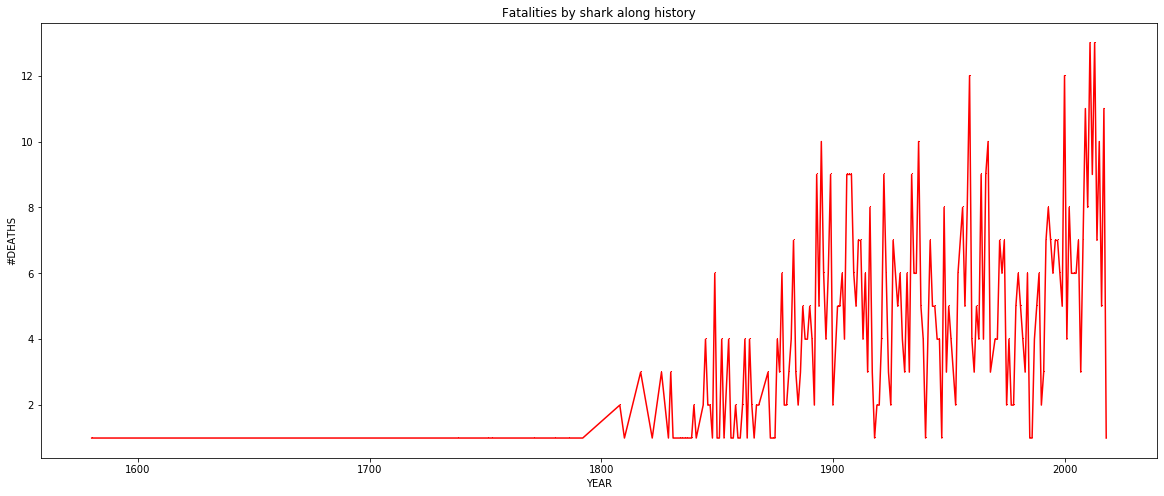

In [48]:
plt.figure(figsize=(20,8))
plt.title('Fatalities by shark along history')
plt.xlabel('YEAR')
plt.ylabel('#DEATHS')
plt.plot(attackFATAL.groupby('realYear').Injury.count(), 'r,-')
plt.show()

In [49]:
#Now let's get the top countries:
print(attackFATAL.groupby('Country').Injury.count())

Country
AFRICA              1
AMERICAN SAMOA      2
ARUBA               1
ATLANTIC OCEAN      6
AUSTRALIA         202
                 ... 
VIETNAM             2
WEST INDIES         2
WESTERN SAMOA       1
YEMEN               1
YEMEN               3
Name: Injury, Length: 108, dtype: int64


In [51]:
attackFATAL.Country = attackFATAL.Country.str.replace(r'(.*)?(YEMEN)(.*)', 'YEMEN')
#Correcting Yemen as it is duplicated in the list.

In [52]:
GB_FATAL = attackFATAL.groupby('Country').Injury.count()

In [53]:
GB_FATAL = GB_FATAL.sort_values(ascending = False)

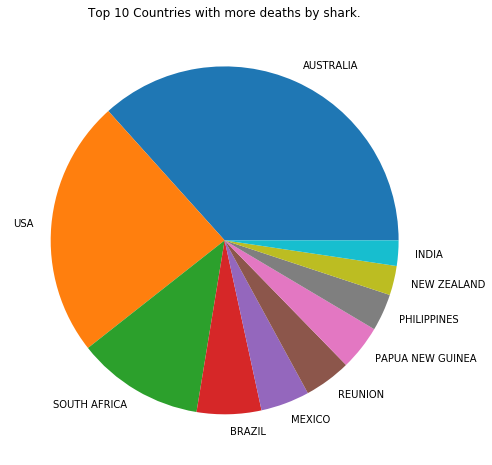

In [54]:
plt.figure(figsize=(20,8))
plt.title('Top 10 Countries with more deaths by shark.')
labels = ['AUSTRALIA','USA','SOUTH AFRICA','BRAZIL','MEXICO','REUNION','PAPUA NEW GUINEA','PHILIPPINES','NEW ZEALAND',
'INDIA']
plt.pie(GB_FATAL.head(10), labels=labels)
plt.show()